# Week 3 Seminar Solutions

## Question 1: Data Retrieval, Analysis, and Visualization

1. **Data Retrieval**:
- Use yfinance to retrieve S&P 500 and VIX indices data.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as si

In [2]:
sp500 = yf.download('^SPX', start='2022-10-01', end='2023-10-01')
vix = yf.download('^VIX', start='2022-10-01', end='2023-10-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2. **Visualizations**:
- Utilize matplotlib for plotting data separately and combined using subplots.

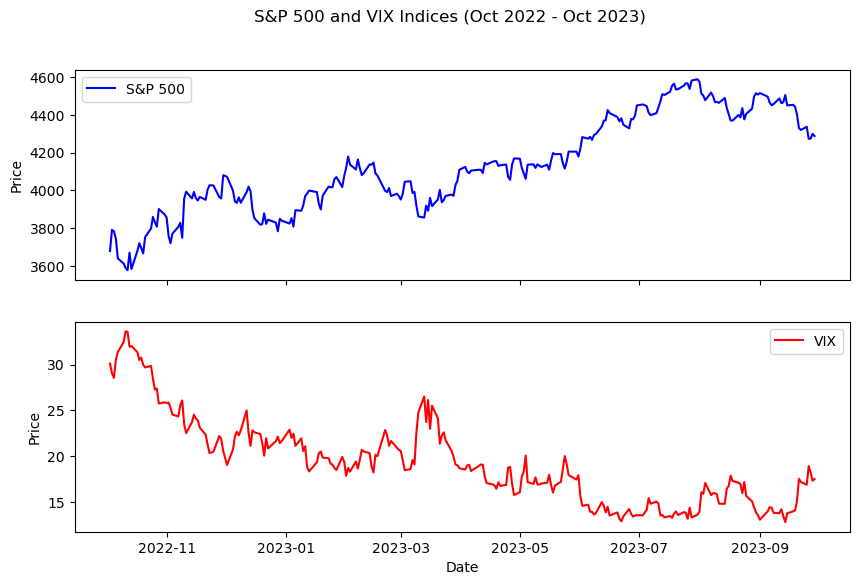

In [3]:
# Subplots
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 6))
fig.suptitle('S&P 500 and VIX Indices (Oct 2022 - Oct 2023)')

# Plotting S&P 500
axs[0].plot(sp500['Adj Close'], label='S&P 500', color='blue')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plotting VIX
axs[1].plot(vix['Adj Close'], label='VIX', color='red')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price')
axs[1].legend()

plt.show()

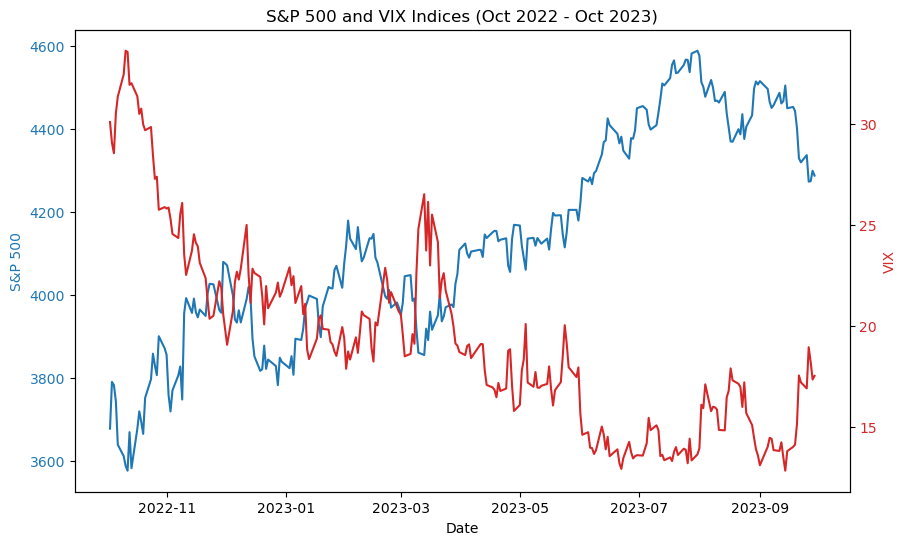

In [4]:
# Create figure and subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting S&P 500 Index
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500', color=color)  # Y label for S&P 500
ax1.plot(sp500['Close'], color=color)  # S&P 500 plot
ax1.tick_params(axis='y', labelcolor=color)  # Color for S&P 500 Y-axis labels

# Create a second Y-axis for plotting VIX
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('VIX', color=color)  # Y label for VIX
ax2.plot(vix['Close'], color=color)  # VIX plot
ax2.tick_params(axis='y', labelcolor=color)  # Color for VIX Y-axis labels

# Adding title and displaying the plot
plt.title('S&P 500 and VIX Indices (Oct 2022 - Oct 2023)')
plt.show()

3. **Log Returns and Correlation Coefficient**:
- Calculate and plot log returns and find the correlation coefficient.

In [5]:
# Calculate log returns
sp500['LogRet'] = np.log(sp500['Close'] / sp500['Close'].shift(1))
vix['LogRet'] = np.log(vix['Close'] / vix['Close'].shift(1))

# Calculate correlation
correlation = sp500['LogRet'].corr(vix['LogRet'])

# Print the correlation
print(f"The correlation between the log returns of S&P 500 and VIX from Oct 2022 to Oct 2023 is {correlation:.4f}")

The correlation between the log returns of S&P 500 and VIX from Oct 2022 to Oct 2023 is -0.6364


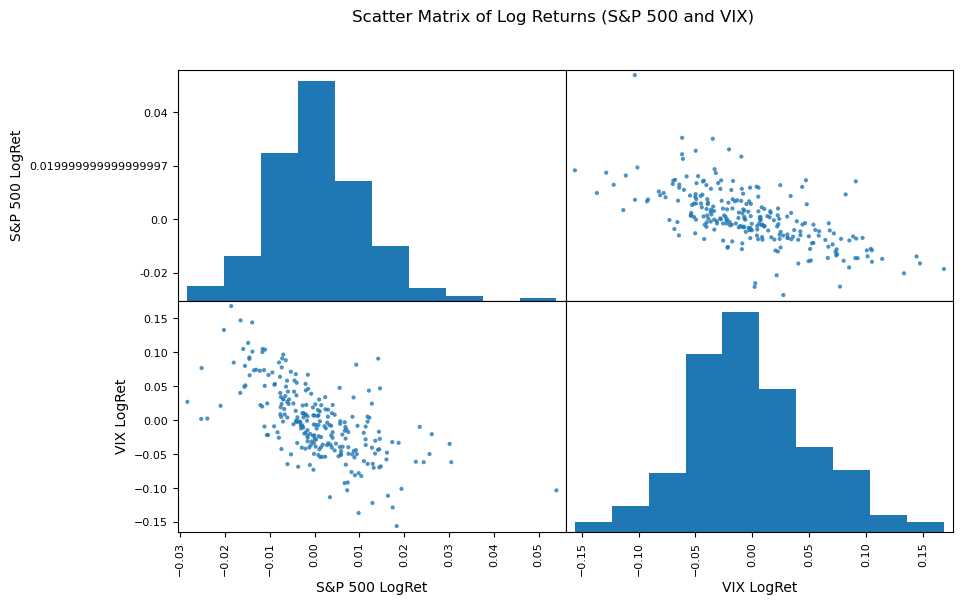

In [6]:
# Creating a DataFrame with log returns
data = pd.DataFrame({'S&P 500 LogRet': sp500['LogRet'], 'VIX LogRet': vix['LogRet']}).dropna()

# Scatter matrix
pd.plotting.scatter_matrix(data, alpha=0.8, figsize=(10, 6), diagonal='hist')
plt.suptitle('Scatter Matrix of Log Returns (S&P 500 and VIX)')
plt.show()

- Apply numpy for linear fitting.

In [7]:
# Linear fitting
fit = np.polyfit(data['S&P 500 LogRet'], data['VIX LogRet'], 1)

# Extracting and printing the slope and intercept
slope, intercept = fit
print(f"The linear regression model is: Y = {slope:.4f}X + {intercept:.4f}")

The linear regression model is: Y = -3.2097X + -0.0002


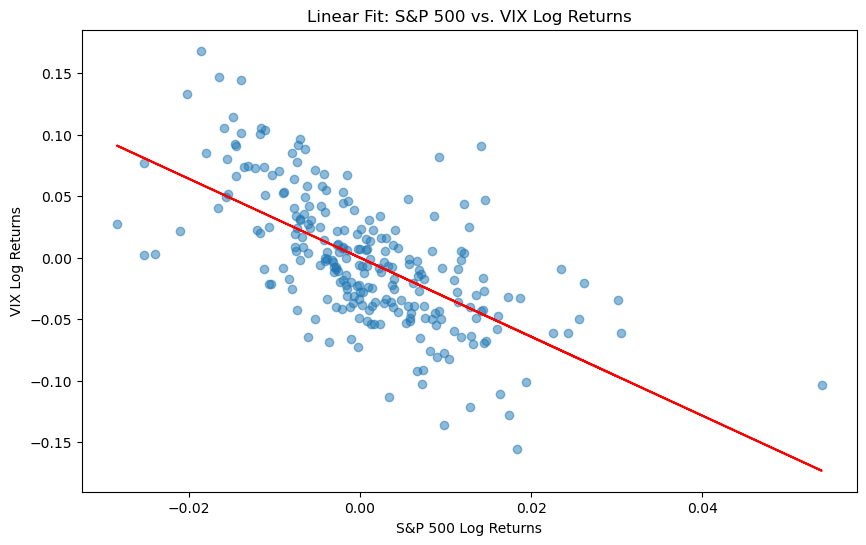

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['S&P 500 LogRet'], data['VIX LogRet'], alpha=0.5)
plt.plot(data['S&P 500 LogRet'], np.polyval(fit, data['S&P 500 LogRet']), color='red')
plt.title('Linear Fit: S&P 500 vs. VIX Log Returns')
plt.xlabel('S&P 500 Log Returns')
plt.ylabel('VIX Log Returns')
plt.show()

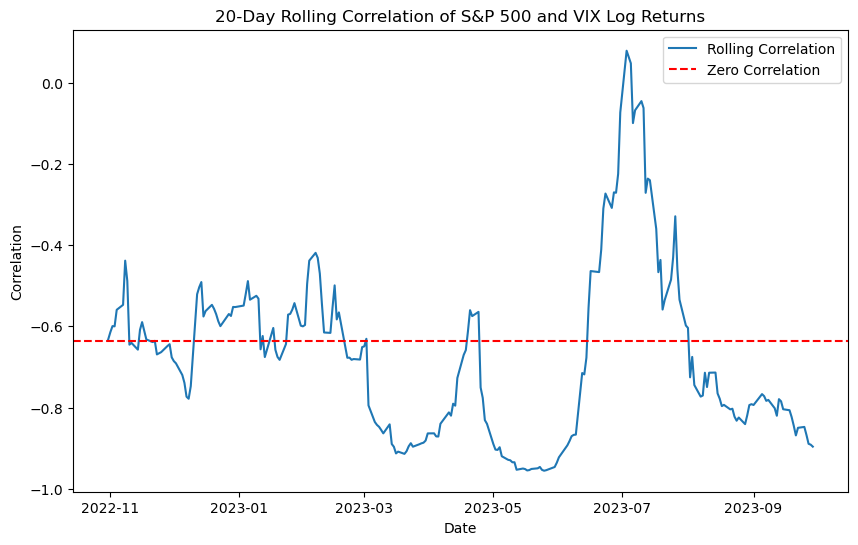

In [9]:
# Calculating rolling correlation with a window of 20 trading days
rolling_corr = data['S&P 500 LogRet'].rolling(window=20).corr(data['VIX LogRet'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rolling_corr, label='Rolling Correlation')
plt.axhline(correlation, color='red', linestyle='--', label='Zero Correlation')
plt.title('20-Day Rolling Correlation of S&P 500 and VIX Log Returns')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

## Question 2: Option Pricing Comparison

1. **Call Option Pricing**:
- Utilize the Black-Scholes model to calculate the theoretical call option price given the provided parameters (risk-free rate, strike price, underlying asset price, and volatility).

In [10]:
def black_scholes_call(S, K, T, r, sigma):
    """
    S: Current price of the underlying asset
    K: Option strike price
    T: Time to expiration
    r: Risk-free rate
    sigma: Volatility
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    call_price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    
    return call_price

2. **Market Price Retrieval and Comparison**:
- Retrieve current market price of the specified option using yfinance.
- Compare and discuss discrepancies with the theoretical price from Black-Scholes.

### 2.1 Calculate Theoretical Price Using Black-Scholes Model

In [11]:
# Sample input values
S = yf.download('^SPX', start='2023-10-02', end='2023-10-03')['Adj Close'].item()   # Using the last available closing price as current price
K = 4300
T = 1/12  # One month to expiration
r = 0.045  # Risk-free rate 4.5%
sigma = sp500['LogRet'].std() * np.sqrt(252)  # Annualized volatility

[*********************100%***********************]  1 of 1 completed


In [12]:
# Calculate and print the theoretical price
bs_price = black_scholes_call(S, K, T, r, sigma)
print(f"Theoretical Black-Scholes Price of the Call Option: ${bs_price:.2f}")

Theoretical Black-Scholes Price of the Call Option: $85.33


### 2.2 Get Current Market Price of an Option

In [13]:
# Define the ticker and retrieve data
ticker = "^SPX"
stock = yf.Ticker(ticker)

# Get option chain for a specific expiration date
opt = stock.option_chain('2023-11-01')

# Retrieve the call option with a strike price of $4300
call_4300 = opt.calls.loc[opt.calls['strike'] == 4300]

# Extract and print the last traded price
market_price = call_4300['lastPrice'].values[0]
print(f"Market Price of the Call Option: ${market_price:.2f}")

Market Price of the Call Option: $105.55


### 2.3 Compare and Discuss

- Compare: Simply observe the differences between the market price and the Black-Scholes price.

In [14]:
print(f"Difference between Market and Black-Scholes Price: ${market_price - bs_price:.2f}")

Difference between Market and Black-Scholes Price: $20.22


3. **Explanation**:
- Dive into possible reasons behind the pricing differences, such as:
  - Market conditions (demand/supply factors).
  - Divergences from assumptions (like constant volatility) of the Black-Scholes model.
  - Potential dividend payouts affecting option pricing.
  - Differences in the implied volatility used in market pricing.